<a href="https://colab.research.google.com/github/BorysZhyhalo/DataScience_RobotDreams/blob/main/Lesson11_Decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Встановлення бібліотек, необхідних візуалізації дерев рішень.

In [ ]:
!pip install graphviz
!pip install pydotplus

In [ ]:
!conda install -c conda-forge python-graphviz
!conda install -c conda-forge pydotplus

# Classification

## Iris dataset

In [ ]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np

The [sklearn.tree](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree) module includes decision tree-based models for classification and regression.

In [ ]:
iris = load_iris()
X, y = iris.data, iris.target

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [ ]:
help(tree.DecisionTreeClassifier())

Help on DecisionTreeClassifier in module sklearn.tree._classes object:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to

При виведенні дерева, щоб збільшити масштаб, збільшуємо розмір фігури і розмір шрифту.

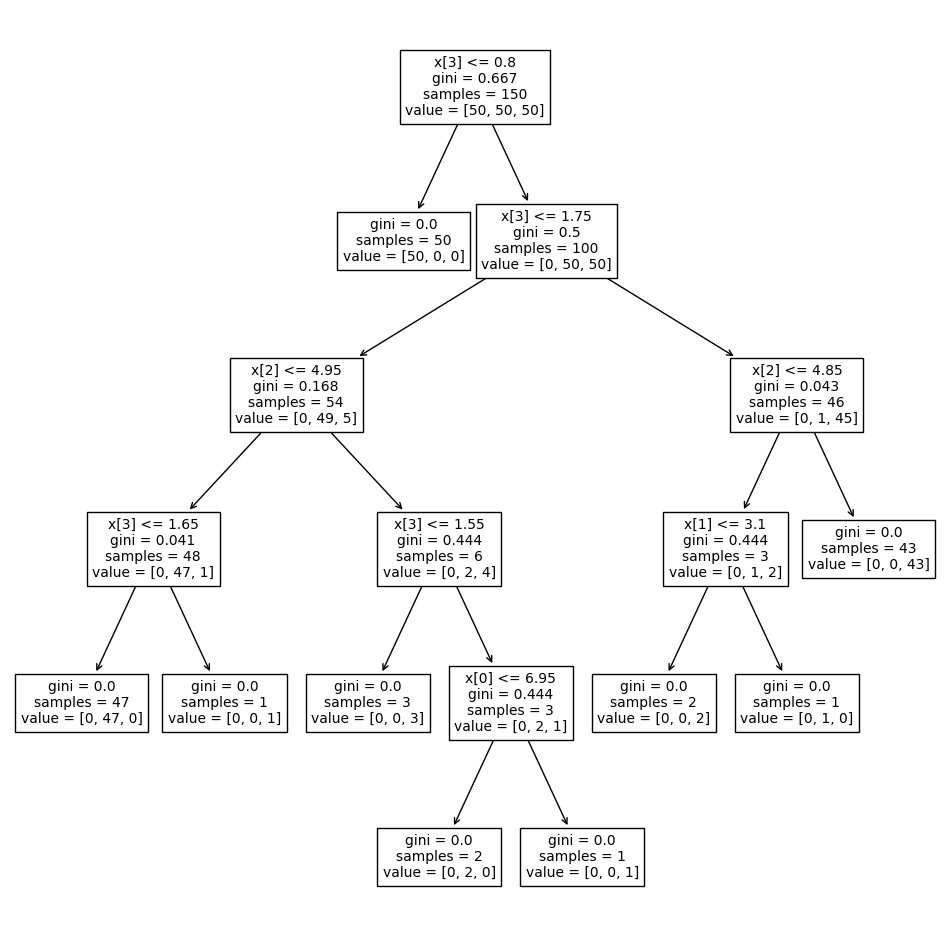

In [ ]:
plt.figure(figsize=(12,12))
tree.plot_tree(clf, fontsize=10)
plt.show()

Можемо зберегти візуалізацію у pdf.

**DOT Language** is abstract grammar for defining Graphviz nodes, edges, graphs, subgraphs, and clusters.

In [ ]:
import graphviz
#export decision tree in a DOT format
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")

'iris.pdf'

Можна розфарбувати листя та гілки залежно від домінуючого класу та експортувати до об'єкта для візуалізації.

In [ ]:
dot_data = tree.export_graphviz(clf,
                     out_file=None,
                     feature_names=iris.feature_names,
                     class_names=iris.target_names,
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)

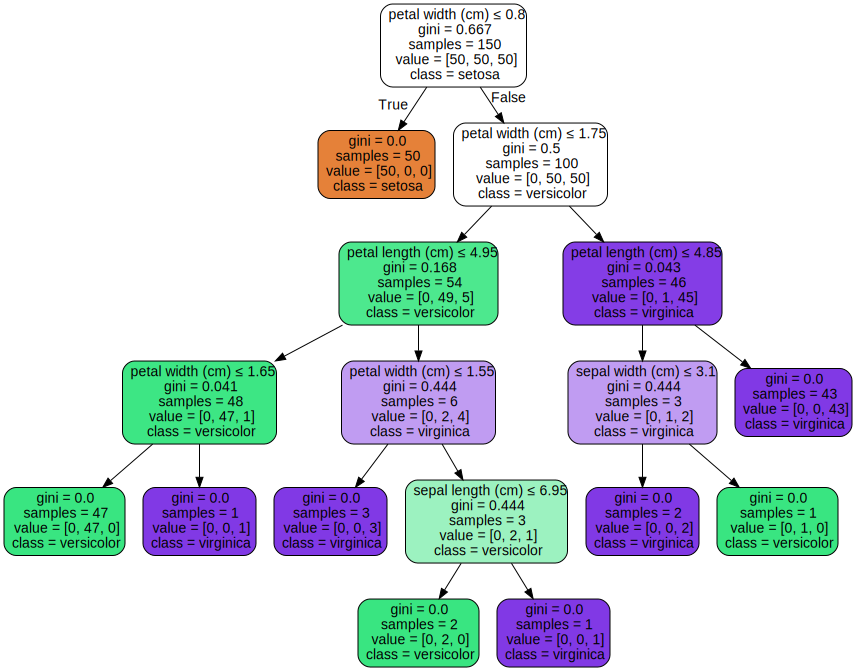

In [ ]:
graph

Можемо обмежити глибину, отримати правила ухвалення рішень з дерева:

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text

decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(iris.data, iris.target)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



Ми можемо згенерувати набір даних для класифікації, щоб проводити експерименти та валідувати гіпотези:

(300, 2)

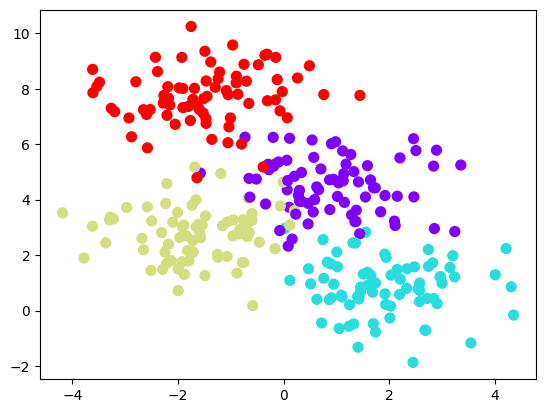

In [ ]:
from sklearn.datasets import make_blobs

#Generate isotropic Gaussian blobs for clustering.
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');
X.shape

А так можна візуалізувати межу ухвалення рішень, побудовану деревом:

In [ ]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()

    # тренувальні точки
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # тренуємо модель
    print(X.shape)
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    print(Z.shape)
    # створюжмо кольоровий графік з результатами
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap,
                           zorder=1)
    ax.set(xlim=xlim, ylim=ylim)
    plt.show()

Contourf [demo](https://matplotlib.org/stable/gallery/images_contours_and_fields/contourf_demo.html)

(300, 2)
(200, 200)


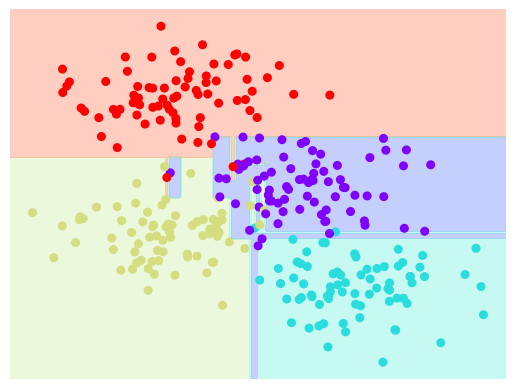

In [ ]:
visualize_classifier(DecisionTreeClassifier(), X, y)

## PIMA dataset

Опис набору даних PIMA (Pima Indians Diabetes Database): https://www.kaggle.com/uciml/pima-indians-diabetes-database


This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
feature_columns = np.setdiff1d(df.columns, 'Outcome')
X = df[feature_columns]
y = df.Outcome
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1)

In [ ]:
clf = DecisionTreeClassifier(random_state=42)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7186147186147186


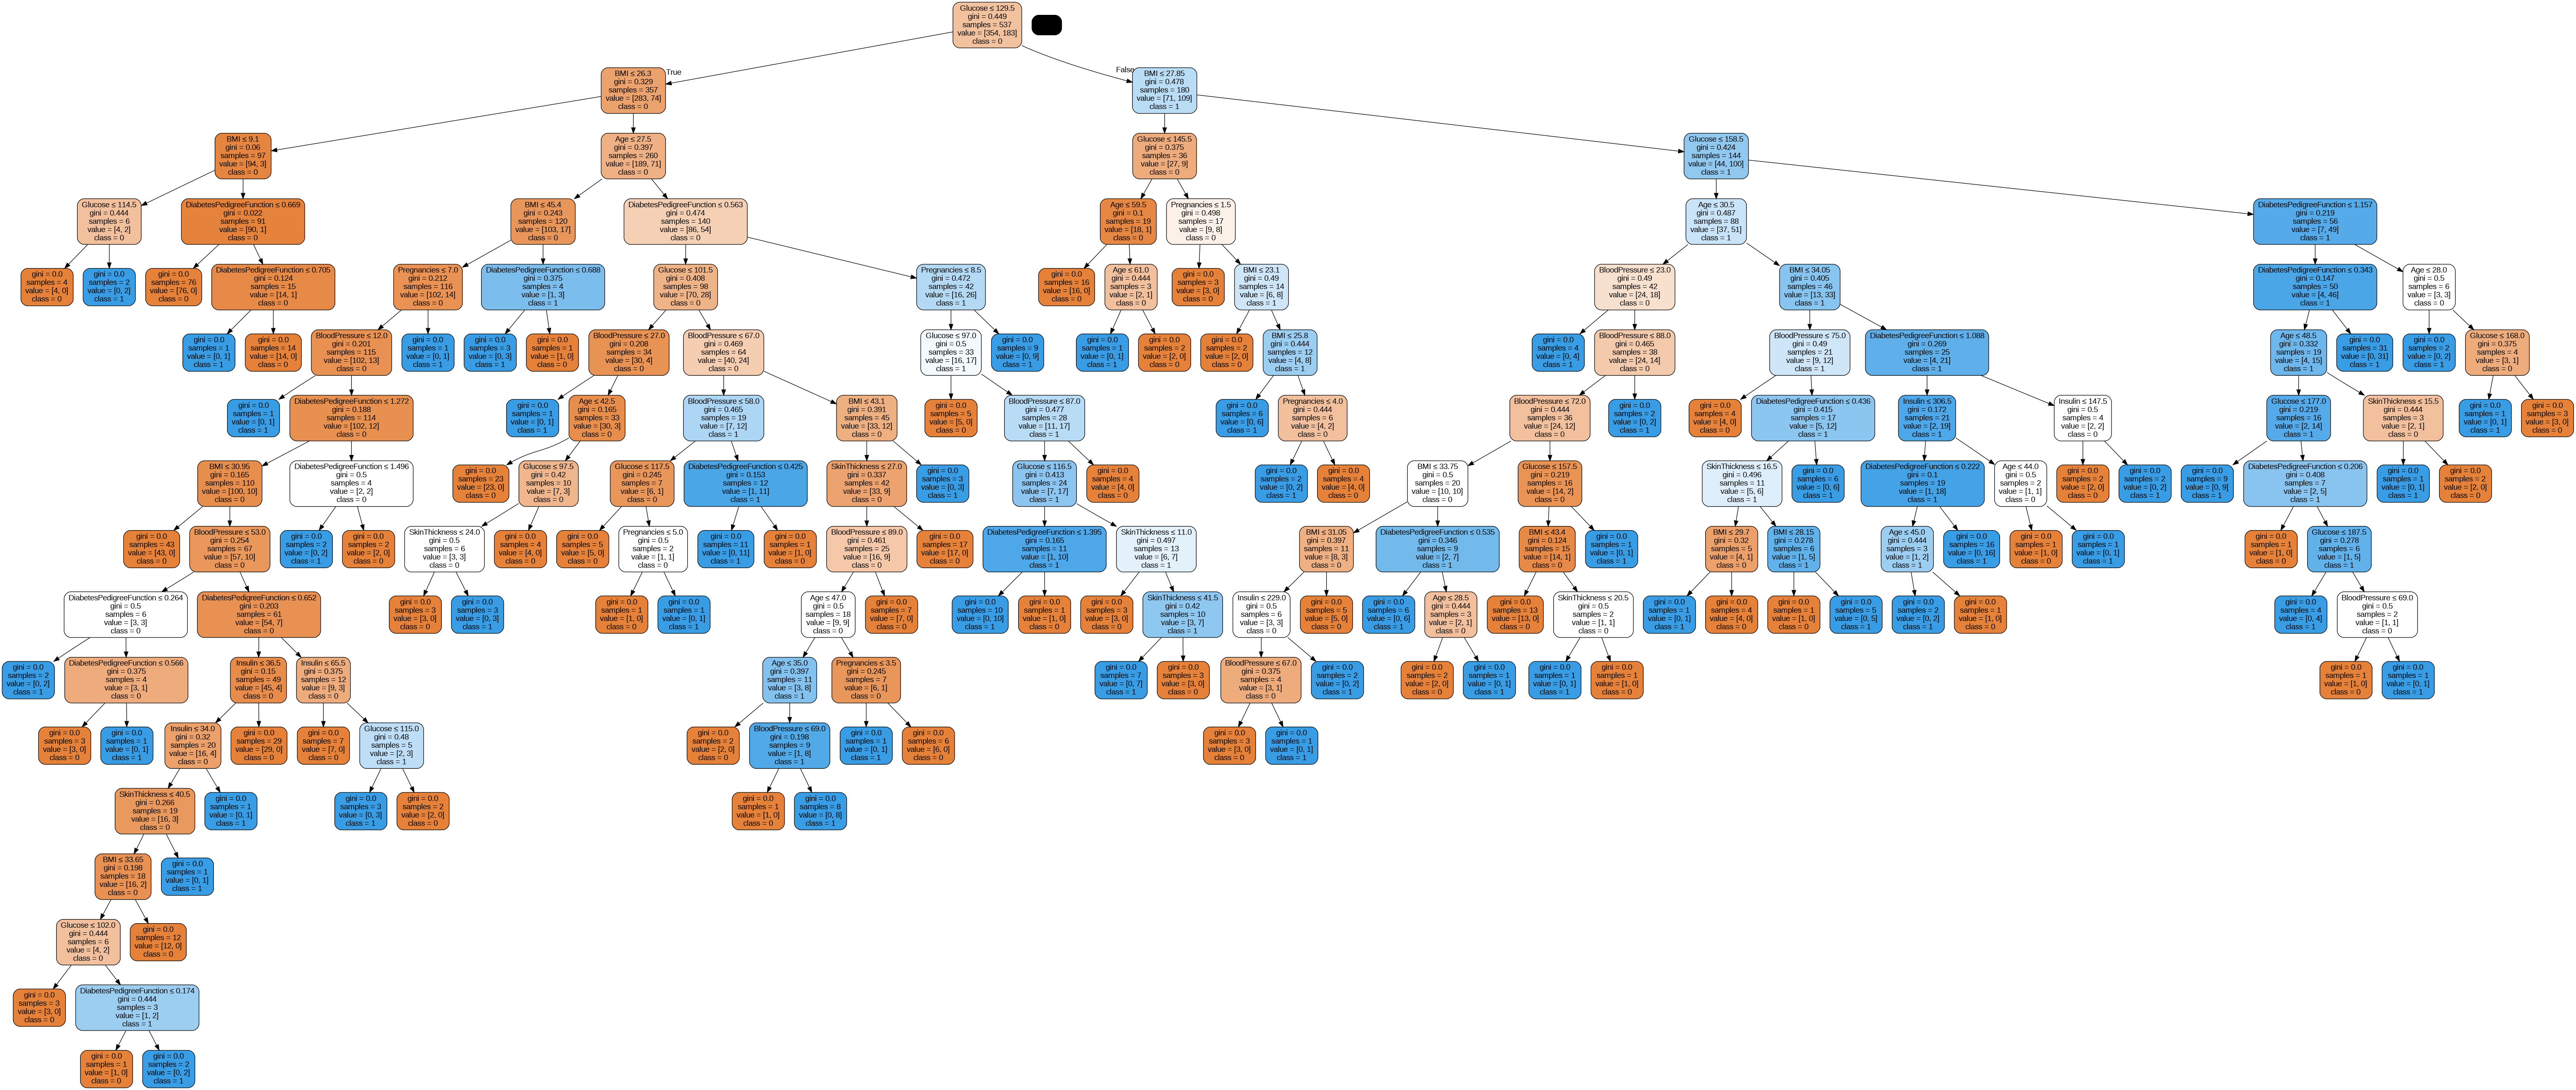

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=feature_columns,
                class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

Виявлення важливості ознак:

In [ ]:
pd.DataFrame(zip(feature_columns, clf.feature_importances_), columns=['col name', 'feature importance']).style.background_gradient()

,col name,feature importance
0,Age,0.110522
1,BMI,0.179327
2,BloodPressure,0.141756
3,DiabetesPedigreeFunction,0.128500
4,Glucose,0.279911
5,Insulin,0.035721
6,Pregnancies,0.049234
7,SkinThickness,0.075030


In [ ]:
for i, j in zip(feature_columns, clf.feature_importances_):
  print(i, j)

Age 0.1105217205857766
BMI 0.17932687906056757
BloodPressure 0.14175558434359392
DiabetesPedigreeFunction 0.12849998405901672
Glucose 0.2799107692848709
Insulin 0.03572132576774634
Pregnancies 0.04923408998097587
SkinThickness 0.07502964691745201


# Regression

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

Створимо штучний набір даних:

In [ ]:
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

In [ ]:
display(X.shape, y.shape)

(80, 1)

(80,)

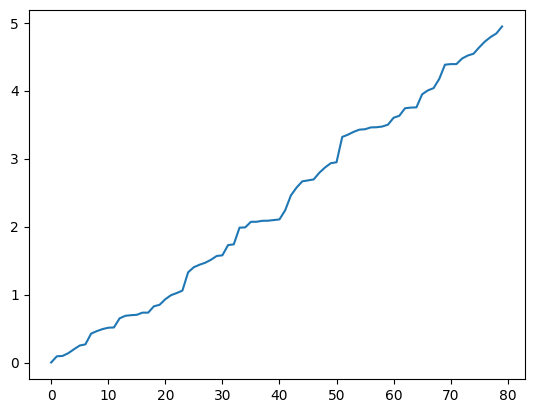

In [ ]:
plt.plot(X);

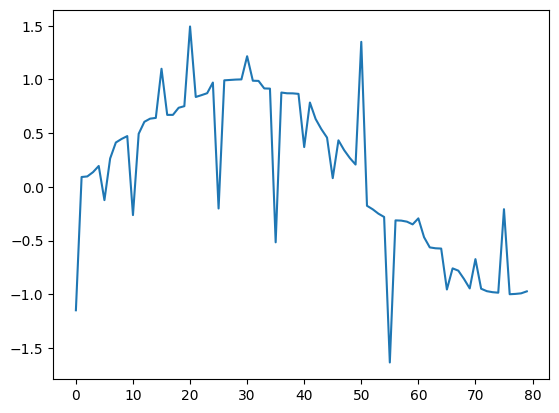

In [ ]:
plt.plot(y);

Навчимо дві регресійні моделі з різною максимальною глибиною:

In [ ]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(max_depth=5)

Знайдемо передбачення дерева для точок з інтервалу [0,5].

In [ ]:
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

Візуалізуємо результати.

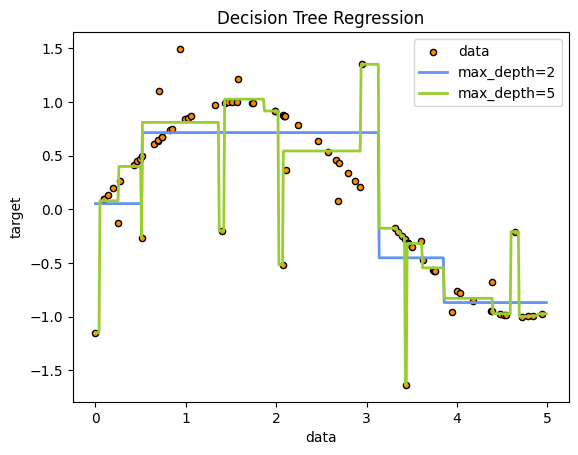

In [ ]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

На що, на вашу думку, може вказувати графік з max_depth = 5?